In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import awswrangler as wr
import pandas as pd

### Step 1:
Download the METLINCCS dataset

Link: https://metlin.scripps.edu/landing_page.php?pgcontent=mainPage

Click on METLIN-CCS | METLIN CCS Lipids and download the excel, export it as csv and load it here.

In [3]:
df = wr.s3.read_csv(
    "ccs-prediction/METLIN_IMS_all_plot_CV_dimers.csv"
)

In [4]:
df.smiles.isna().sum()

0

In [5]:
df.smiles.value_counts()

smiles
--                                                          3425
O=C(C1CCCN1C(=O)c1cccs1)NCc1c(C)nn(c1C)c1ccccc1                3
CN1CCN(CC1)c1sc(c(n1)c1ccc(cc1)Br)C                            3
Cc1ccc(cc1)c1n[nH]c(=S)n1CC(=O)Nc1scc(n1)c1ccc2c(c1)OCO2       3
Fc1ccc(cc1)c1csc(n1)NC(=O)c1ccccn1                             3
                                                            ... 
O=C1OCCC1Sc1nnc(n1c1ccccc1C)c1ccncc1                           1
Clc1ccc(s1)CN1CCN(CC1)C(=O)c1nn(Cc2ccccc2)c(=O)c2c1cccc2       1
O=C(N1CCN(CC1)C(=O)C1CC1)C1CCN(CC1)C(=O)c1ccco1                1
O=C(C12CCC(C2)CC1)Nc1ccc2c(c1)C(=O)c1c(C2=O)cccc1              1
COC(=O)c1sccc1S(=O)(=O)Nc1nc2ccccc2nc1N1CCCC1                  1
Name: count, Length: 27634, dtype: int64

In [6]:
df.Adduct.value_counts()

Adduct
[M+H]     28136
[M-H]     19697
[M+Na]    17450
Name: count, dtype: int64

In [7]:
df.shape

(65288, 21)

In [8]:
df = df.loc[~(df["smiles"] == "--") & (df["CCS_AVG"].notna())]

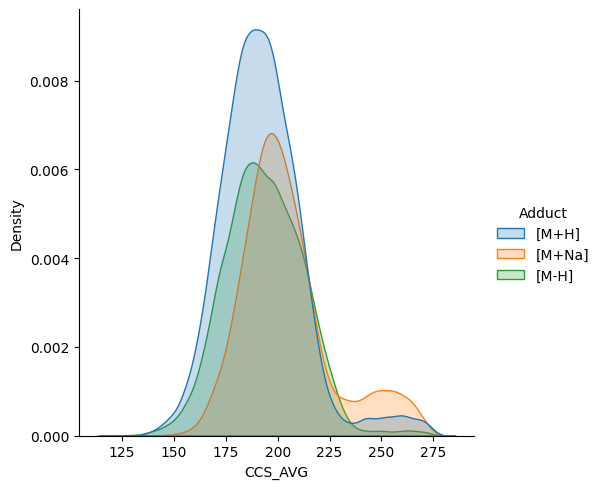

In [9]:
import seaborn as sns

sns.displot(df, x="CCS_AVG", kind="kde", hue="Adduct", fill=True)

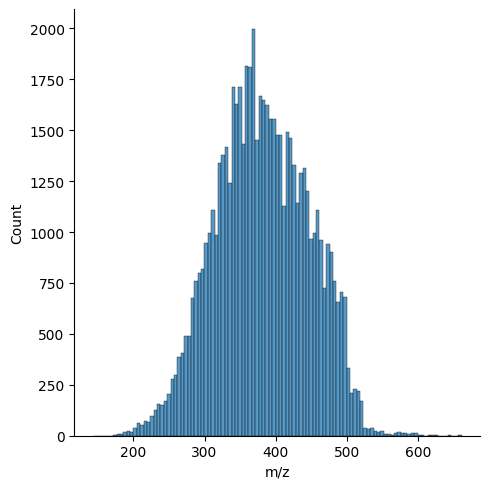

In [10]:
sns.displot(df, x="m/z")

In [11]:
df = df.loc[~df.smiles.str.contains(".", regex=False)].copy()

In [12]:
df["smiles_adduct"] = df.apply(lambda x: f"{x.smiles}_{x.Adduct}", axis=1)

<Axes: >

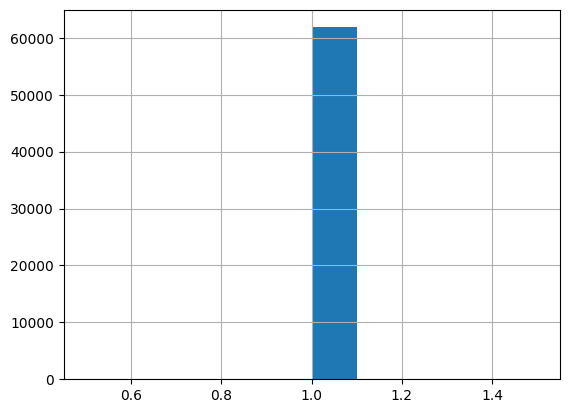

In [13]:
df["smiles_adduct"].value_counts().hist()

In [14]:
def mean_abs_dev(x):
    return (x - x.mean()).abs().mean()

<Axes: >

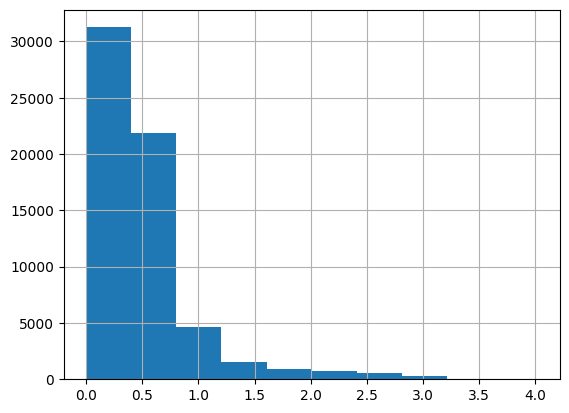

In [15]:
df["mean_abs_dev"] = df[["CCS1", "CCS2", "CCS3"]].apply(mean_abs_dev, axis=1)
df["mean_abs_dev"].hist()

<Axes: >

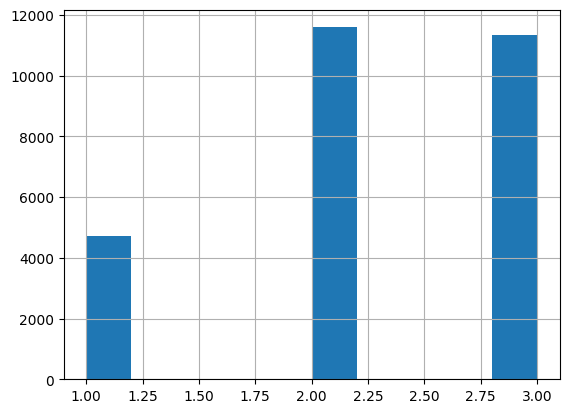

In [14]:
df["smiles"].value_counts().hist()

In [31]:
df.columns

Index(['Molecule Name', 'Molecular Formula', 'METLIN ID', 'Precursor Adduct',
       'CCS1', 'CCS2', 'CCS3', 'CCS_AVG', '% CV', 'm/z', 'Adduct', 'm/z.1',
       'Dimer', 'Dimer.1', 'dimer line', 'CCS', 'm/z.2', 'pubChem', 'inchi',
       'smiles', 'InChIKEY', 'smiles_adduct'],
      dtype='object')

Export dataset ready to be used in the next notebook.

In [32]:
df.to_parquet(
    "ccs-prediction/metlin-clean-all-columns.parquet"
)